Mounted at /content/drive
Found 402 images belonging to 2 classes.
Found 100 images belonging to 2 classes.

 TRAINING : DENSENET121 MODEL 

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training only top layers...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7333 - loss: 0.5654
Epoch 1: val_accuracy improved from -inf to 0.84000, saving model to /content/drive/MyDrive/models/DenseNet121/best_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.7345 - loss: 0.5633 - val_accuracy: 0.8400 - val_loss: 0.3699
Epoch 2/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8157 - loss: 0.4196
Epoch 2: val_accuracy did not improve from 0.84000
26/26 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.8165 - loss: 0.4182 - val_accuracy: 0.8400 - val_loss: 0.3398
Epoch 3/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8455 - loss: 0.2871
Epoch 3: val_accuracy did not improve from 0.84000
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.8460 - loss: 0.2872 - val_accuracy: 0.8100 - val_loss: 0.3992
Epoch 4/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8900 - loss: 0.2695
Epoch 4: val_accuracy did not improve from 0.84000
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.8897 - loss: 0.2696 - val_accuracy: 0.8400 - val_loss: 0.2964
Epoch 5/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8920 - loss: 0.2678
Epoch 5: val_accuracy improved from 0.84000 to 0.90000, s

26/26 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.8917 - loss: 0.2684 - val_accuracy: 0.9000 - val_loss: 0.2388
Epoch 6/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8989 - loss: 0.2562
Epoch 6: val_accuracy did not improve from 0.90000
26/26 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.8989 - loss: 0.2558 - val_accuracy: 0.8500 - val_loss: 0.3031
Epoch 7/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9147 - loss: 0.2232
Epoch 7: val_accuracy did not improve from 0.90000
26/26 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.9139 - loss: 0.2239 - val_accuracy: 0.8500 - val_loss: 0.3390
Epoch 8/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9339 - loss: 0.1639
Epoch 8: val_accuracy did not improve from 0.90000
26/26 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9336 - loss: 0.1648 - val_accuracy: 0.8400 - val_loss: 0.3613

Fine-tuning DenseNet121...

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8600 - loss: 0.3395
Epoch 1: val_accuracy did not


FINAL MODEL SAVED  → final_model.h5
BEST MODEL SAVED   → best_model.h5



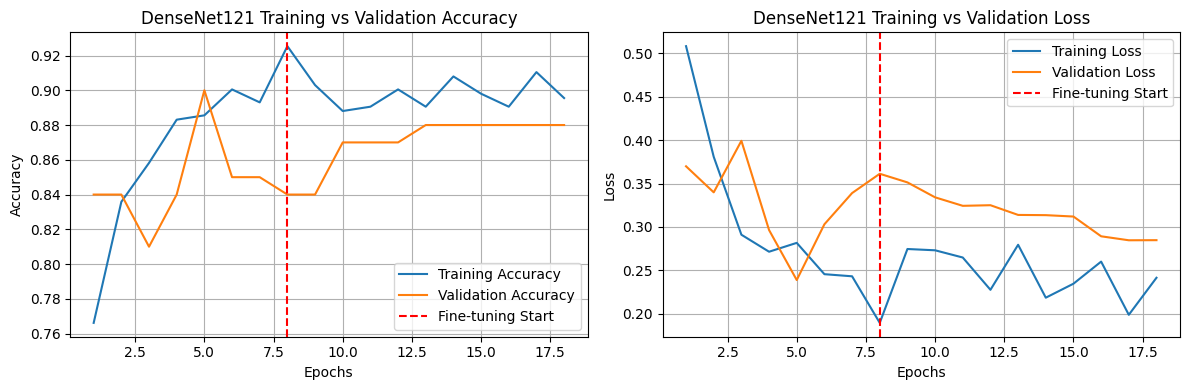


DenseNet121 TRAINING COMPLETE!


In [1]:
# --------------------------------------
# MOUNT GOOGLE DRIVE
# --------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# --------------------------------------
# IMPORTS
# --------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
import matplotlib.pyplot as plt
import os

# --------------------------------------
# DATA PATHS
# --------------------------------------
train_dir = '/content/drive/MyDrive/my_dataset1/my_dataset/train'
test_dir  = '/content/drive/MyDrive/my_dataset1/my_dataset/test'

# --------------------------------------
# DATA GENERATORS
# --------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
img_size = (224, 224)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ---------------------------------------------------
# BUILD DENSENET121 MODEL
# ---------------------------------------------------
print("\n==============================")
print(" TRAINING : DENSENET121 MODEL ")
print("==============================\n")

base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------
# SAVE DIRECTORY
# --------------------------------------
save_folder = "/content/drive/MyDrive/models/DenseNet121"
os.makedirs(save_folder, exist_ok=True)

checkpoint = ModelCheckpoint(
    filepath=f"{save_folder}/best_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# --------------------------------------
# FIRST TRAINING PHASE (TOP LAYERS)
# --------------------------------------
print("Training only top layers...\n")

history1 = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=8,
    callbacks=[checkpoint]
)

# --------------------------------------
# FINE TUNING
# --------------------------------------
print("\nFine-tuning DenseNet121...\n")

base_model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=[checkpoint]
)

# --------------------------------------
# SAVE FINAL MODEL
# --------------------------------------
model.save(f"{save_folder}/final_model.h5")

print("\n====================================")
print("FINAL MODEL SAVED  → final_model.h5")
print("BEST MODEL SAVED   → best_model.h5")
print("====================================\n")

# --------------------------------------
# TRAINING GRAPHS (ACCURACY + LOSS)
# --------------------------------------
def plot_training_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # ACCURACY GRAPH
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.axvline(x=len(history1.history['accuracy']), color='r',
                linestyle='--', label='Fine-tuning Start')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('DenseNet121 Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)

    # LOSS GRAPH
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.axvline(x=len(history1.history['loss']), color='r',
                linestyle='--', label='Fine-tuning Start')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('DenseNet121 Training vs Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{save_folder}/training_history.png")
    plt.show()

# Plot final graphs
plot_training_history(history1, history2)

print("\n==============================")
print("DenseNet121 TRAINING COMPLETE!")
print("==============================")
